In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
import matplotlib.ticker as mticker
from matplotlib.transforms import offset_copy
import cartopy.feature as cfeature

# 1. Global Earthquakes

In [2]:
# 读取和检查数据
Eq = pd.read_csv("usgs_earthquakes.csv")
Eq.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


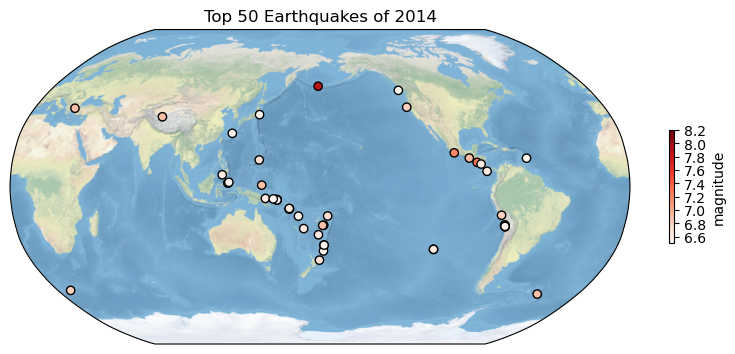

In [5]:
#选取数据，将最大的50个值排序
data = Eq.sort_values('mag', ascending = False)[:50]
data
#画图
fig = plt.figure(figsize=(10,5), dpi=100)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
#让海洋呈现蓝色，将陆地和海洋分开
ax.stock_img()
ax.set_title('Top 50 Earthquakes of 2014')

AA = ax.scatter(data.longitude,data.latitude,c=data['mag'],edgecolors = 'k',cmap='Reds',transform = ccrs.PlateCarree())
fig.colorbar(AA, shrink =0.3 ,ticks = np.linspace(6.6,8.2,9) ,label = 'magnitude')
plt.show()

# 2. Explore a netCDF dataset

In [6]:
# 读取并检查数据
ds = xr.open_dataset('MERRA2.statM_2d_pct_Nx.202109.nc4')
ds

<xarray.Dataset>
Dimensions:  (lon: 576, lat: 361, time: 1)
Coordinates:
  * lon      (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * time     (time) datetime64[ns] 2021-09-01T00:30:00
Data variables:
    T2MMEAN  (time, lat, lon) float32 ...
    T2MMAX   (time, lat, lon) float32 ...
    T2MMIN   (time, lat, lon) float32 ...
    PRECTOT  (time, lat, lon) float32 ...
Attributes: (12/30)
    ShortName:                         M2SMNXPCT
    LongName:                          MERRA-2 statM_2d_pct_Nx: 2d, Single-Le...
    VersionID:                         V1
    Description:                       Percentile of Monthly MERRA-2 data bas...
    Format:                            NetCDF-4
    ProcessingLevel:                   Level 4
    ...                                ...
    LongitudeResolution:               0.625
    Title:                             MERRA-2 statM_2d_pct_Nx: 2d, Single-Le...
    Filename:                          MERRA2.statM_2d_pct_Nx.202109.nc4
    Institution:                       NASA Global Modeling and Assimilation ...
    DataResolution:                    0.5 x 0.625
    Contact:                           http://gmao.gsfc.nasa.gov

## 2.1 Make a global map of T2MMAX

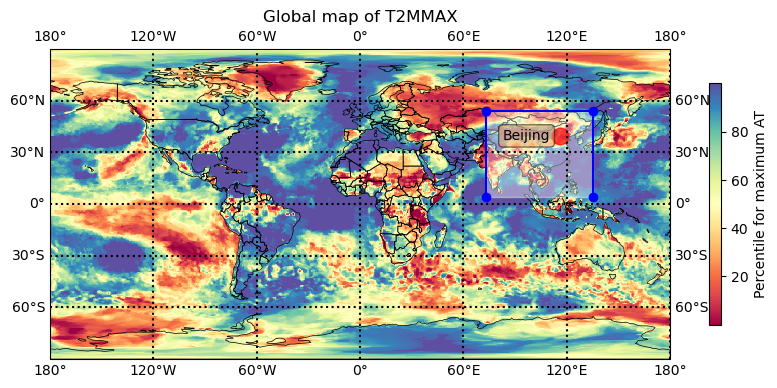

In [44]:
# 创建画布
fig = plt.figure(figsize=(10, 8),dpi=100)

ax = plt.axes(projection=ccrs.PlateCarree())
# 画图
ds['T2MMAX'].plot(transform=ccrs.PlateCarree(),cmap='Spectral',cbar_kwargs={'shrink': 0.4,'label':"Percentile for maximum AT"})

# 添加边界线
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

# 添加注释
x, y =  [73,73,135,135] , [3.8,54,54,3.8]
ax.plot(x, y, marker='o',color='blue', transform=ccrs.PlateCarree())
ax.fill(x, y, color='white', transform=ccrs.PlateCarree(), alpha=0.4)
central_lon, central_lat = 116.25,39.54 
ax.plot(central_lon,central_lat, marker='o', color='red', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())

# 添加文本
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-10)

ax.text(central_lon,central_lat, 'Beijing',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

# 添加坐标轴,但是不知为何图片中不展示
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# 创建网格线
ax.gridlines(draw_labels=True,linestyle=":",linewidth=1.5,color='k')
# 添加标题
plt.title("Global map of T2MMAX")

plt.show()

## 2.2 Make a regional map of T2MMAX

F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
F:\Anaconda3\lib\site-packages\xarray\core\indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
F:\Anaconda3\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
F:\Anaconda3\lib\site-packages\cartopy\crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
F:\Ana

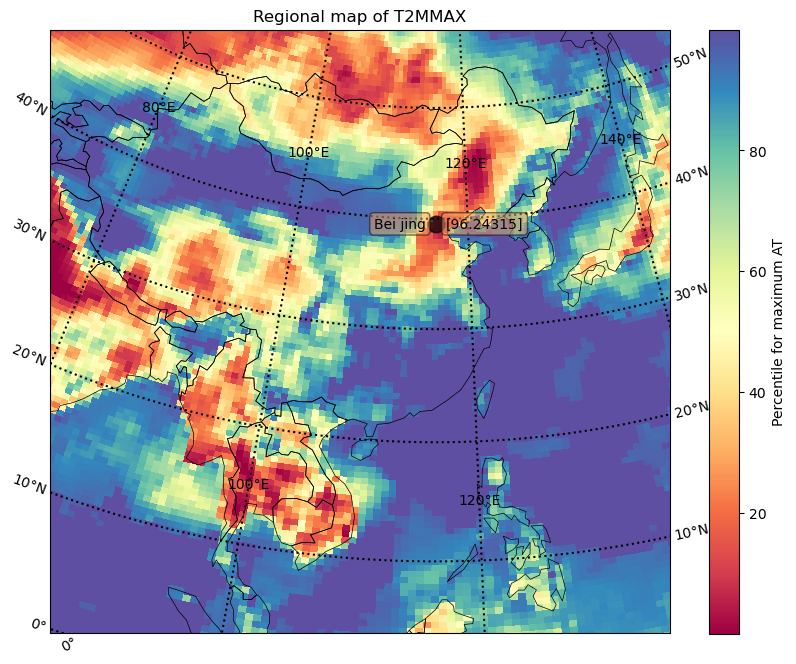

In [47]:
# 创建画布
plt.figure(figsize=(10,10),dpi=100)
central_lon, central_lat = 116.25,39.54 
proj = ccrs.LambertConformal(central_lon,central_lat)
ax = plt.axes(projection=proj)

# 画图
ds['T2MMAX'].plot(transform=ccrs.PlateCarree(),cmap='Spectral',cbar_kwargs={'shrink': 0.8,'label':"Percentile for maximum AT"})

# 设置并应用范围
extent = [central_lon-30,central_lon+18,central_lat-35.74,central_lat+14.46]
ax.set_extent(extent)

# 添加边界线
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))
ax.add_feature(cfeature.LAND, edgecolor='black')

# 北京的T2MMAX值
T2MMAX_BJ = ds.T2MMAX.sel(lon='114.0',lat='22.5', method='nearest').values

ax.plot(central_lon,central_lat, marker='o', color='black', markersize=12,
            alpha=0.7, transform=ccrs.PlateCarree())

# 添加注释文本
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-10)
text_transform1 = offset_copy(geodetic_transform, units='dots', x=+10)

ax.text(central_lon,central_lat,T2MMAX_BJ,
            verticalalignment='center', horizontalalignment='left',
            transform=text_transform1,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))
ax.text(central_lon,central_lat,'Bei jing',
            verticalalignment='center', horizontalalignment='right',
            transform=text_transform,
            bbox=dict(facecolor='sandybrown', alpha=0.5, boxstyle='round'))

# 添加网格线
ax.gridlines(draw_labels=True,linestyle=":",linewidth=1.5,color='k')

# 添加标题
plt.title("Regional map of T2MMAX")
plt.show()